# Identify sythetic lethality pairs

In [2]:
import pandas as pd

### CRISPR knockout screen across 1000+ cell lines

df_crispr = pd.read_csv('CRISPRGeneEffect.csv',index_col=0)
df_crispr.columns = [s[0:s.index('(')-1] for s in df_crispr.columns]

In [63]:
df_crispr

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ACH-000004,0.014633,-0.032777,-0.151299,-0.071388,0.046511,-0.162850,0.290698,-0.240991,0.176710,0.159418,...,-0.188857,-0.389649,0.112266,-0.002883,0.155729,0.077283,-0.294451,0.143978,0.197069,-0.003338
ACH-000005,-0.261566,0.174833,0.106526,0.135635,-0.076753,-0.278640,0.239279,-0.325967,-0.116848,0.022227,...,-0.195492,-0.360578,-0.126277,-0.059287,0.080543,-0.161894,-0.070230,-0.006275,0.002458,0.014259
ACH-000007,-0.028717,-0.117017,0.030971,0.083795,0.032668,-0.035709,0.012355,-0.192436,-0.077174,0.164877,...,-0.200402,-0.382707,0.006843,0.199553,0.064425,-0.031683,-0.291406,-0.065945,-0.260946,-0.329018
ACH-000009,0.000225,-0.283124,0.051248,0.120321,0.022834,-0.077522,0.028013,-0.190495,0.031589,0.043242,...,-0.179775,-0.285412,-0.029599,0.227176,-0.097506,-0.136990,-0.421927,0.050002,-0.107675,-0.249623
ACH-000011,0.095791,-0.099622,0.022204,0.199771,-0.048126,-0.290812,-0.013277,-0.095840,0.090307,0.029379,...,-0.671885,-0.558008,0.020997,0.011011,0.206251,0.086453,-0.166360,-0.055975,-0.159886,-0.311232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002296,-0.073879,0.046252,-0.077086,0.028623,-0.000662,0.003801,0.023230,-1.143038,0.004579,0.115898,...,0.135984,-0.666816,0.015930,-0.000437,0.157030,-0.054452,-0.260831,0.064285,0.041468,-0.428699
ACH-002297,0.084735,-0.249753,0.045093,0.070714,-0.194074,-0.038278,-0.029772,-0.743310,0.081368,0.155969,...,-0.407122,-0.473605,-0.000171,0.153230,-0.066343,0.029340,-0.120501,-0.058169,-0.179429,-0.172884
ACH-002298,-0.172365,-0.112164,0.055771,-0.017571,-0.010154,-0.069917,-0.092145,-0.135460,0.008202,-0.132641,...,-0.270696,-0.383323,0.101514,0.101316,0.110317,-0.006500,-0.158971,-0.114161,0.128512,-0.267323
ACH-002304,-0.033065,0.171028,-0.044622,0.185127,0.063611,-0.047573,0.118359,-0.571989,-0.101702,0.263272,...,0.106406,-0.300325,-0.034307,-0.176315,-0.054927,-0.079415,-0.130105,0.133510,-0.126235,-0.211761


In [64]:
df_cn = pd.read_csv('OmicsCNGene.csv',index_col=0)

df_cn.columns = [s[0:s.index('(')-1] for s in df_cn.columns]

In [65]:
df_cn

,DDX11L1,WASH7P,MIR6859-1,MIR1302-2,FAM138A,OR4F5,WASH9P,MIR6859-2,OR4F29,AL669831.3,...,BPY2C,TTTY4C,CSPG4P1Y,CDY1,TTTY3,SNORD38B,SCARNA4,SNORA50A,SNORD3D,POLR2J3
ACH-000759,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.675758,1.285546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000681,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,0.775472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-000769,2.988233,2.988233,2.988233,2.988233,2.988233,2.988233,0.831376,0.831376,0.831376,0.831376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACH-002291,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,0.790799,...,0.450553,0.450553,0.450553,0.450553,0.450553,NaN,NaN,NaN,NaN,NaN
ACH-000853,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,1.083618,...,0.637717,0.637717,0.637717,0.637717,0.637717,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000185,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,1.000350,...,0.047106,0.047106,0.155943,0.089672,0.089672,1.000950,1.040914,1.003705,0.995258,1.008223
ACH-001044,0.542823,0.542823,0.542823,0.542823,0.542823,0.542823,1.043950,1.043950,1.043950,1.043950,...,0.711068,0.711068,0.711068,0.711068,0.711068,1.057242,1.067719,0.852284,0.994610,1.258299
ACH-000494,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,1.005360,...,0.078468,0.078468,0.140482,0.140482,0.140482,1.008726,0.990482,1.003003,1.002252,1.005009
ACH-001087,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,1.038911,...,0.218842,0.218842,0.218842,0.218842,0.218842,1.045753,1.025980,1.090470,1.036552,1.074846


In [66]:
ind_cn = list(set(df_crispr.index)&set(df_cn.index))

## Synthetic lethality between MTAP deletion & PRMT5 inhibition

<img src="MTAP_science.png" alt="SyntheticLethal" style="width:800px;height:400px;" align="left">

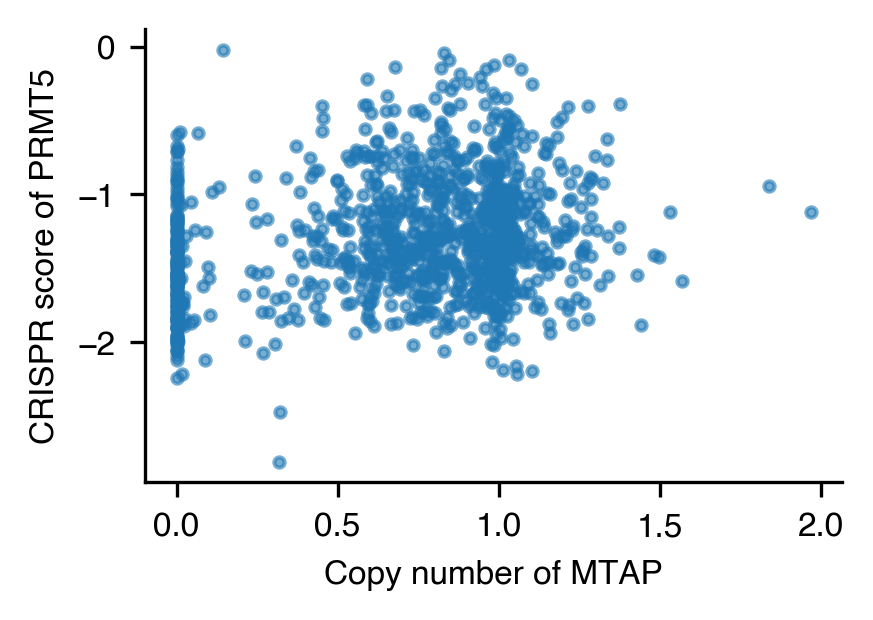

In [22]:
## Pan-cancer analysis

import matplotlib.pyplot as plt

plt.figure(figsize=(3,2),dpi=300)
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "Helvetica"


ls1 = df_cn.loc[ind_cn,'MTAP']
ls2 = df_crispr.loc[ind_cn,'PRMT5']

plt.scatter(ls1,ls2,s=4,alpha=0.6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Copy number of MTAP')
plt.ylabel('CRISPR score of PRMT5')
plt.show()

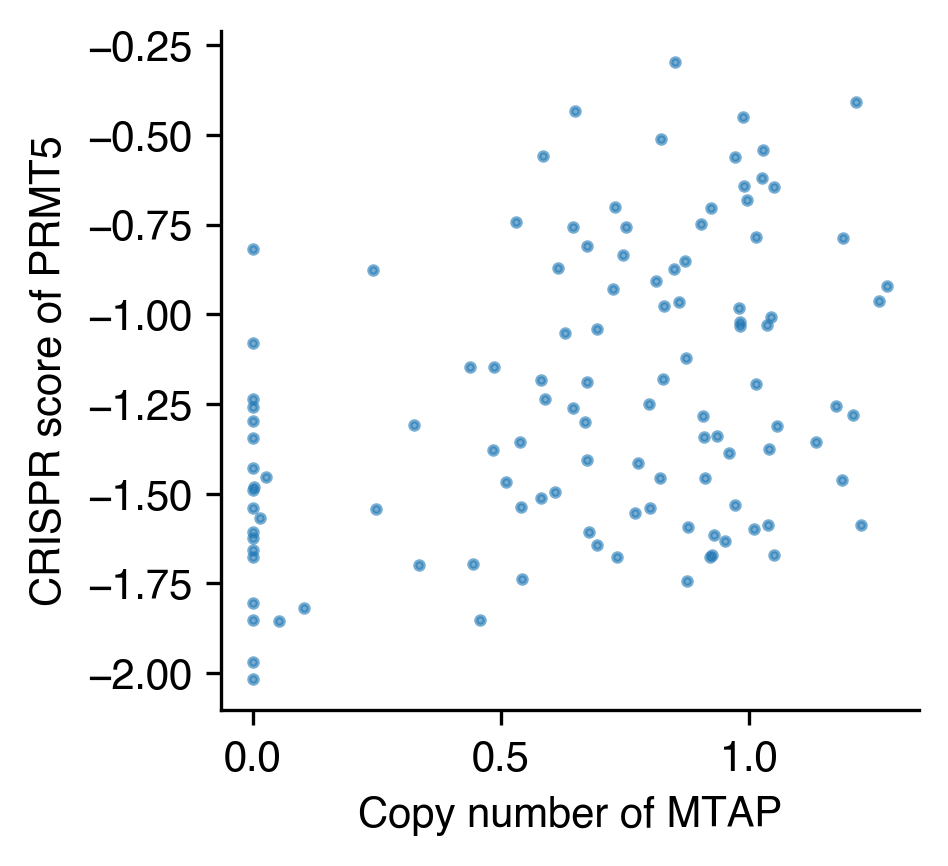

In [62]:
## Cancer type specific analysis

df_cell = pd.read_csv('Model.csv')

df_cancer = df_cell[df_cell['OncotreeLineage']=='Lung']
cell_ls = [c for c in list(df_cancer['ModelID']) if c in ind_cn]


plt.figure(figsize=(3,3),dpi=300)
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "Helvetica"


ls1 = df_cn.loc[cell_ls,'MTAP']
ls2 = df_crispr.loc[cell_ls,'PRMT5']

plt.scatter(ls1,ls2,s=4,alpha=0.6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Copy number of MTAP')
plt.ylabel('CRISPR score of PRMT5')
plt.show()


## Synthetic lethality between BRCA mutation & PARP1 inhibition

<img src="PARP_science.png" alt="SyntheticLethal" style="width:800px;height:400px;" align="left">

In [38]:
df_mut = pd.read_csv('OmicsSomaticMutations.csv')

df_mut.index = list(df_mut['DepMap_ID'])

## Get cell lines that are common in CRISPR and mutation data
ind_mut = list(set(df_crispr.index)&set(df_mut.index))

/Users/whe3/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (32,40,48,49,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


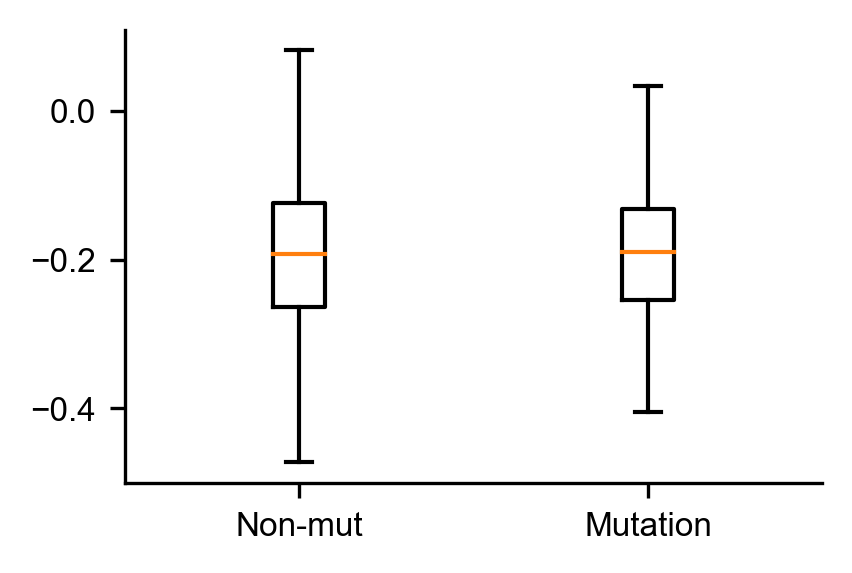

In [59]:
## Pan-cancer analysis

mut_set = set(df_mut[(df_mut['HugoSymbol']=='BRCA1')]['DepMap_ID'])
non_mut = set(df_mut['DepMap_ID']) - mut_set

gene = 'PARP1'

ls_mut = df_crispr.loc[[ind for ind in list(mut_set) if ind in ind_mut],gene]
ls_non = df_crispr.loc[[ind for ind in list(non_mut) if ind in ind_mut],gene]
                                  
plt.figure(figsize=(3,2),dpi=300)

plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "Arial"


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.boxplot([ls_non,ls_mut],labels=['Non-mut','Mutation'],showfliers=False)
plt.tick_params(labelsize=8)
plt.show()  

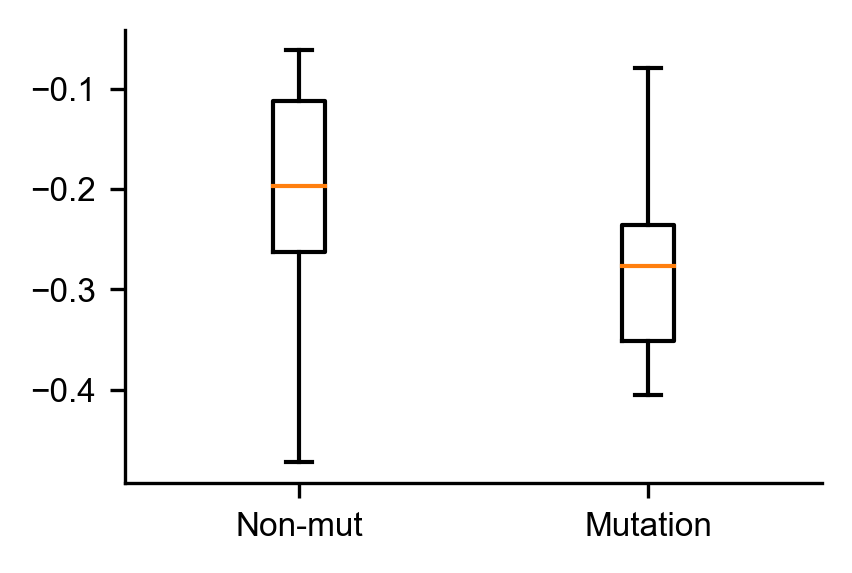

In [60]:
## Cancer type specific analysis

df_cancer = df_cell[df_cell['OncotreeLineage']=='Ovary/Fallopian Tube']
cell_ls = [c for c in list(df_cancer['ModelID']) if c in ind_mut]

mut_set = set(df_mut[(df_mut['HugoSymbol']=='BRCA1')]['DepMap_ID'])
non_mut = set(df_mut['DepMap_ID']) - mut_set

gene = 'PARP1'

ls_mut = df_crispr.loc[[ind for ind in list(mut_set) if ind in cell_ls],gene]
ls_non = df_crispr.loc[[ind for ind in list(non_mut) if ind in cell_ls],gene]
                                  
plt.figure(figsize=(3,2),dpi=300)

plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "Arial"


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.boxplot([ls_non,ls_mut],labels=['Non-mut','Mutation'],showfliers=False)
plt.tick_params(labelsize=8)
plt.show()                     